<a href="https://colab.research.google.com/github/ketanp23/sit-neuralnetworks-class/blob/main/Learning_Curves_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scenario: Classify handwritten digits (MNIST) using a small neural network.



Goal: Plot accuracy (instead of loss) to see how the model learns to recognize digits.



Why Neural Networks?: Learning curves are critical in deep learning to check if more epochs (training rounds) help or hurt.



Setup: Use TensorFlow/Keras for a simple feedforward neural network.

What It Does: Trains on increasing amounts of data, plots training and validation MSE. A good model shows both curves dropping and converging.

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8804 - loss: 0.4250 - val_accuracy: 0.9604 - val_loss: 0.1365
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9650 - loss: 0.1202 - val_accuracy: 0.9693 - val_loss: 0.0978
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9766 - loss: 0.0782 - val_accuracy: 0.9765 - val_loss: 0.0806
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9830 - loss: 0.0557 - val_accuracy: 0.9734 - val_loss: 0.0820
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9862 - loss: 0.0453 - val_accuracy: 0.9752 - val_loss: 0.0809
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9899 - loss: 0.0330 - val_accuracy: 0.9753 - val_loss: 0.0824
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9919 - loss: 0.0265 - val_accuracy: 0.9777 - val_loss: 0.0775
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9932 - loss: 0.0220 - 

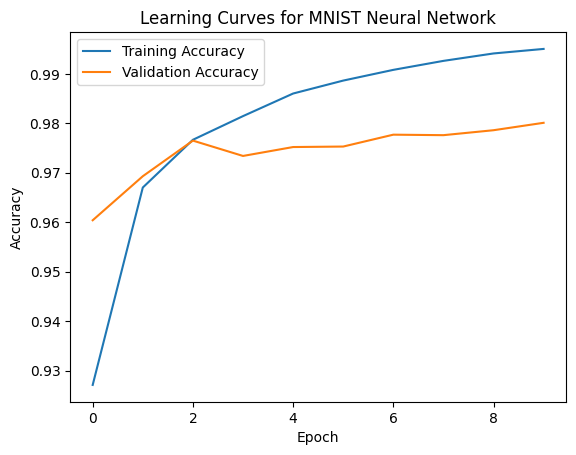

In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

# Load MNIST data
(X_train, y_train), (X_val, y_val) = tf.keras.datasets.mnist.load_data()
X_train, X_val = X_train / 255.0, X_val / 255.0  # Normalize

# Build simple neural network
model = models.Sequential([
    layers.Flatten(input_shape=(28, 28)),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train and record history
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_val, y_val), batch_size=32)

# Plot learning curves
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Learning Curves for MNIST Neural Network')
plt.show()